This notebook examines the abrupt experiments which follow a 500 year spinup.

In [69]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client()
display(client)

Client Scheduler: tcp://127.0.0.1:33073 Dashboard: /proxy/39243/status,Cluster Workers: 3 Cores: 6 Memory: 25.77 GB


In [3]:
### Generate new database

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'

session = cc.database.create_session(db)

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_cont,150429
1,output111,2096
2,output112,2096
3,output113,2096
4,output114,2096
5,output115,2096
6,output116,2096
7,output117,2096
8,output118,2096
9,output119,2096


In [30]:
help(cc.querying.get_variables)

Help on function get_variables in module cosima_cookbook.querying:

get_variables(session, experiment, frequency=None)
    Returns a DataFrame of variables for a given experiment and optionally
    a given diagnostic frequency.



In [20]:
# Control, temp

control_expt = '1deg_jra55_ryf_cont'
control = cc.querying.get_variables(session, experiment = control_expt)

temp_control = cc.querying.getvar(control_expt, 'temp', session, frequency = '1 monthly').chunk(chunks='auto')
for i in range(1,10):
    da = cc.querying.getvar('output11{}'.format(i), 'temp', session, frequency = '1 monthly')
    temp_control = xr.concat([temp_control, da],dim='time')

In [58]:
# Control, GAT

GAT_control = cc.querying.getvar(control_expt, 'temp_global_ave', session).groupby('time.year').mean('time')[:-1] # Cuts off year 2455, included in next array
for i in range(1,10):
    da = cc.querying.getvar('output11{}'.format(i), 'temp_global_ave', session)[:-1].groupby('time.year').mean('time')
    GAT_control = xr.concat([GAT_control, da], dim='year')

In [63]:
# Control, SST

SST_control = cc.querying.getvar(control_expt, 'temp_surface_ave', session).groupby('time.year').mean('time')[:-1]
for i in range(1,10):
    da = cc.querying.getvar('output11{}'.format(i), 'temp_surface_ave', session)[:-1].groupby('time.year').mean('time')
    SST_control = xr.concat([SST_control, da], dim='year')

In [66]:
# Load into memory

GAT_control = GAT_control.load()
SST_control = SST_control.load()

Text(0.5, 1.0, 'SST')

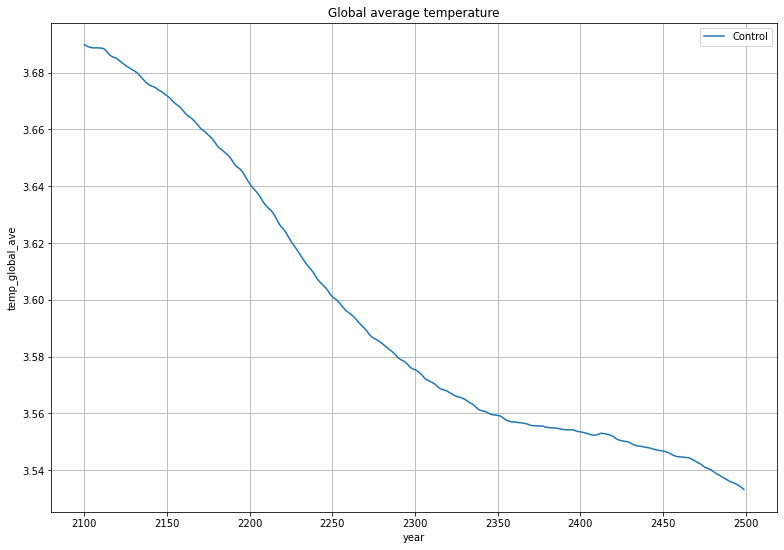

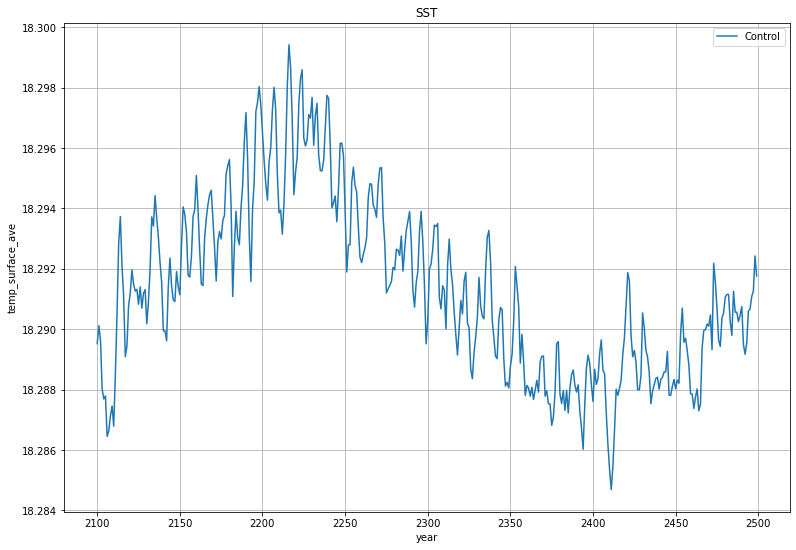

In [72]:
plt.figure(figsize = (13,9))

GAT_control.plot(label='Control')

plt.grid()
plt.legend()
plt.title('Global average temperature')
#plt.savefig('GAT spin-up')


plt.figure(figsize = (13,9))

SST_control.plot(label='Control')

plt.grid()
plt.legend()
plt.title('SST')
#plt.savefig('SST spin-up')

In [70]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

cc.querying.get_variables(session, experiment=control_expt, frequency='1 monthly')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
2,HTE,T cell width on East side,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
3,HTN,T cell width on North side,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
4,NCAT,category maximum thickness,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
5,TLAT,T grid center latitude,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
6,TLON,T grid center longitude,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
7,Tair_m,air temperature,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
8,Tsfc_m,snow/ice surface temperature,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
9,ULAT,U grid center latitude,1 monthly,output110/ice/OUTPUT/iceh.2454-12.nc,4260,2100-01-01 00:00:00,2455-01-01 00:00:00
